# F70 Mechanik und Vakuum Auswertung
#### Jannis Demel, Hannah Gebhardt, Jan Kesting, Felix Fleischle

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

### Saugvermögen der Turbomolekularpumpe

In [5]:
# Messwerte aus dem Messprotokoll
p = np.array([2e-6, 5e-6, 8e-6, 2e-5, 7.1e-5, 2e-4, 7.1e-4, 1.9e-3, 6.8e-3, 2e-2]) #mbar
p_err = np.array([0.05e-6, 0.05e-6, 0.05e-6, 0.05e-5, 0.05e-5, 0.05e-4, 0.05e-4, 0.05e-3, 0.3e-3, 0.05e-2]) #mbar
V = np.array([0.01, 0.01, 0.01, 0.01, 0.04, 0.1, 0.1, 3.5, 9., 5.]) #ml
V_err = np.array([0.0007, 0.0007, 0.0007, 0.0007, 0.0014, 0.007, 0.007, 0.04, 0.04, 0.04]) #ml
t = np.array([128.1, 30., 18.2, 6.83, 7.31, 6.65, 1.92, 77., 20., 7.22])
t_err = np.array([1., 1., 1., 0.2, 0.2, 0.2, 0.2, 10., 3., 0.4])
p_0 = 1013.25 #mbar, Atmosphärendruck 
# Enum der das verwendete Messinstrument beinhaltet
Inst = Enum("Inst", ["Kap_1", "Kap_2", "Kap_3", "Kolben"])
instlist = np.array([Inst.Kap_1, Inst.Kap_1, Inst.Kap_1, Inst.Kap_1, Inst.Kap_2, Inst.Kap_3, Inst.Kap_3, Inst.Kolben, Inst.Kolben, Inst.Kolben])

Berechnung des Saugvermögens aus den Daten: <br />
$S = \frac{\Delta V_a}{ \Delta t}$ mit dem gemessenen Volumen $V_A$ beim Druck $p_a$ in der Pumpe. <br />
Das Volumen V wurde bei Normaldruck gemessen, also muss V_a umgerechnet werden: <br />
$p_0 V = p_a V_a$ <br />
$S = \frac{\Delta V \cdot p_0}{\Delta t \cdot p_a} $

In [6]:
S = V * p_0 / (t * p) / 1000.
S_err = S * np.sqrt((p_err / p)**2 + (V_err / V)**2 + (t_err / t)**2)

print("Saugvermögen S:", S, "+-", S_err)

# Berechnung des Mittelwertes von S von den Werten im Plateau (siehe plot)
# Die Werte des Kolbens wurden nicht berücksichtigt aufgrund der hohen Messunsicherheit
S_mean = np.mean(S[1:7])
S_mean_err = np.std(S[1:7]) + 1./6. * np.sqrt(np.sum(S_err[1:7]**2))

print("Mittleres Saugvermögen:", S_mean, "+-", S_mean_err)

Saugvermögen S: [39.54918033 67.55       69.59134615 74.17642753 78.09098091 76.18421053
 74.32878521 24.24043062 67.05330882 35.0848338 ] +- [ 2.95587195  5.28062641  6.20808698  5.92598135  3.5124894   6.1087752
  9.34306851  3.22401223 10.48824354  2.15088751]
Mittleres Saugvermögen: 73.32029172050122 +- 6.223348900747047


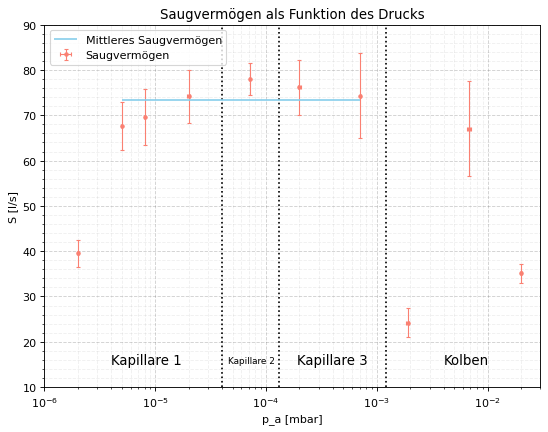

In [7]:
# Plotte S gegen p_a
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(p,S, xerr = p_err, yerr = S_err, linestyle='None', marker = ".", label="Saugvermögen", capsize = 2, elinewidth=1, color="salmon")
plt.xlabel('p_a [mbar]')
plt.ylabel('S [l/s]')
plt.title('Saugvermögen als Funktion des Drucks')
plt.xscale('log')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.1)
plt.minorticks_on()
plt.vlines(4e-5, 100, 0, color="black", linestyle=":")
plt.vlines(1.3e-4, 100, 0, color="black", linestyle=":")
plt.vlines(1.2e-3, 100, 0, color="black", linestyle=":")
plt.hlines(S_mean, p[1], p[6], color="skyblue", label="Mittleres Saugvermögen")
plt.xlim(1e-6, 3e-2)
plt.ylim(10, 90)
plt.text(4e-6, 15, "Kapillare 1", fontsize=12)
plt.text(4.5e-5, 15.25, "Kapillare 2", fontsize=8)
plt.text(1.9e-4, 15, "Kapillare 3", fontsize=12)
plt.text(4e-3, 15, "Kolben", fontsize=12)
plt.legend()

Wir sehen in der Mitte ein Plateau wo das Saugvermögen relativ konstant ist, mit einem abweichenden Messpunkt zu Beginn der Messung und abweichenden Messpunkten bei den Kolbenmessungen. <br />
Man könnte erwarten dass das Saugvermögen grundsätzlich konstant ist, aber bei höheren Drücken absinkt da die Turbomolekularpumpe bei hohen Drücken an ihre Grenzen kommt. Dies deutet sich im letzten Messpunkt auch an, nur der drittletzte Messpunkt passt nicht wirklich hinein. Dies liegt sehr wahrscheinlich daran dass dies der Beginn der Kolbenmessung war, wo der Druck noch so gering war dass sich der Kolben praktisch gar nicht bewegt hat, bis er dann ruckartig stark abgesunken ist. Vermutlich ist diese Messung also sehr ungenau. <br />
Aus dem Plateau haben wir ein mittleres Saugvermögen von $S=(73\pm 6)\frac{l}{s}$ bestimmt, was realistisch erscheint.